In [1]:
##importing all the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization

2024-04-16 04:16:31.387935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 04:16:31.388088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 04:16:31.557570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv")
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:
print(df.columns)
y=df["label"]
x=df.iloc[:,0:2352]

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)


In [4]:

## Performing Exploratory Data Analysis
df.info()
df.describe()
meta_data=pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv")
print(meta_data.head())
meta_data.info()
meta_data.describe()
meta_data.isnull().sum()
meta_data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non

lesion_id       10015
image_id        10015
dx              10015
dx_type         10015
age              9958
sex             10015
localization    10015
dtype: int64

In [5]:
classes = {0: ('nv', ' melanocytic nevi'),
           1: ('mel', 'melanoma'), 
           2 :('bkl', 'benign keratosis-like lesions'),
           3:('bcc' , ' basal cell carcinoma'), 
           4: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           5: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'), 
           6: ('df', 'dermatofibroma')}

['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']


Text(0, 0.5, 'frequency count ')

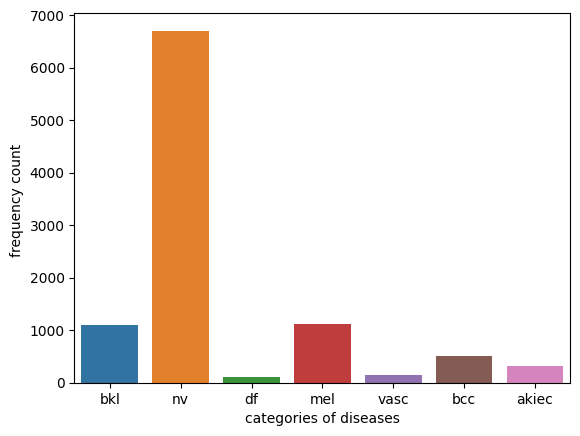

In [6]:
## determining the different classes of the diseases
print(meta_data["dx"].unique())
## frequency distribution of diffrent classes
sns.countplot(x="dx",data=meta_data)
plt.xlabel("categories of diseases")
plt.ylabel("frequency count ")

In [7]:
## this shows we have 57 missing values of age
mean_age=meta_data["age"].mean()
print(mean_age)

## Handling The Missing Data

## we are removing the missing values of age column by the mean age values
data = {
    'lesion_id': [10015],
    'image_id': [10015],
    'dx': [10015],
    'dx_type': [10015],
    'age': [9958, None, 25, None, 30],
    'sex': [10015],
    'localization': [10015]
}

df = pd.DataFrame(meta_data)

df['age'].fillna(mean_age, inplace=True)

print(meta_data.isnull().sum())
print(meta_data.count())

51.863828077927295
lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64
lesion_id       10015
image_id        10015
dx              10015
dx_type         10015
age             10015
sex             10015
localization    10015
dtype: int64


/tmp/ipykernel_33/3085620687.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age, inplace=True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'people with different age distribution')

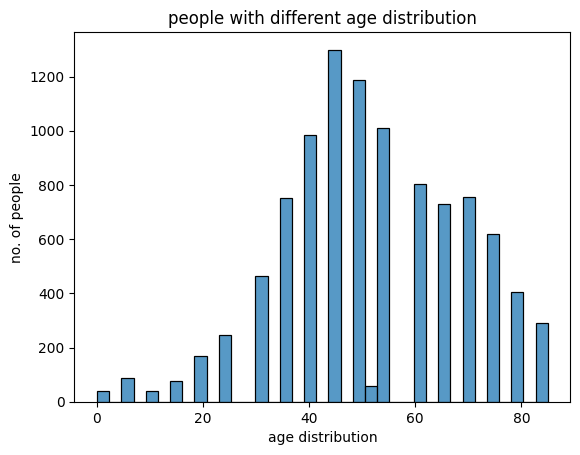

In [8]:
## Data Visualisation 

sns.histplot(meta_data["age"])
plt.xlabel("age distribution")
plt.ylabel("no. of people")
plt.title("people with different age distribution")

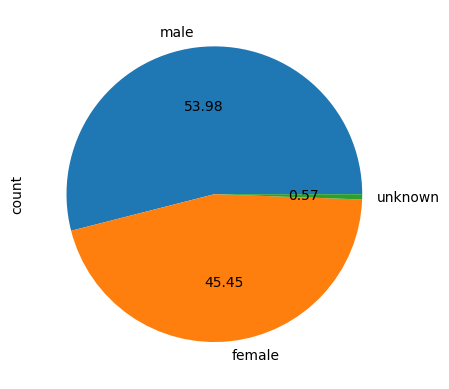

         count
sex           
male      5406
female    4552
unknown     57
['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']
localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64


In [9]:
meta_data["sex"].value_counts().plot(kind="pie",autopct="%.2f")
plt.show()
sex_value=meta_data["sex"].value_counts().to_frame()
print(sex_value)
x_axis=meta_data["localization"].unique()
print(x_axis)
y_axis=meta_data["localization"].value_counts()
print(y_axis)

In [10]:
# Oversampling of Dataset 
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [11]:
## converting the x into array
x=np.array(x)
print(x.shape)
x = x.reshape(-1,28,28,3)
print('Shape of X :',x.shape)

x = (x-np.mean(x))/np.std(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

(46935, 2352)
Shape of X : (46935, 28, 28, 3)


In [12]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 3)),  # Input layer: Flatten the input image
    tf.keras.layers.Dense(128, activation='relu'),    # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')   # Output layer with 10 neurons (for classification) and softmax activation
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [15]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Now you can train the model
history = model.fit(x_train,y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=20,
                   callbacks=[callback])

Epoch 1/20
202/206 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4298 - loss: 1.5592
Epoch 1: saving model to best_model.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4323 - loss: 1.5525 - val_accuracy: 0.6378 - val_loss: 0.9982
Epoch 2/20
199/206 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6932 - loss: 0.8681
Epoch 2: saving model to best_model.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6940 - loss: 0.8660 - val_accuracy: 0.7568 - val_loss: 0.7132
Epoch 3/20
199/206 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7854 - loss: 0.6312
Epoch 3: saving model to best_model.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7859 - loss: 0.6300 - val_accuracy: 0.7882 - val_loss: 0.6063
Epoch 4/20
202/206 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8273 - loss: 0.5096
Epoch 4: saving model to best_model.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8275 - loss: 0.5091 - val_accuracy: 0.8317 - val_loss: 0.5034
Epoch 5/20
199/206 ━

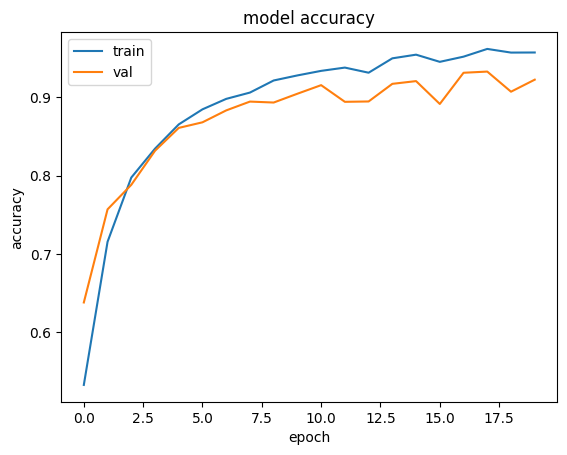

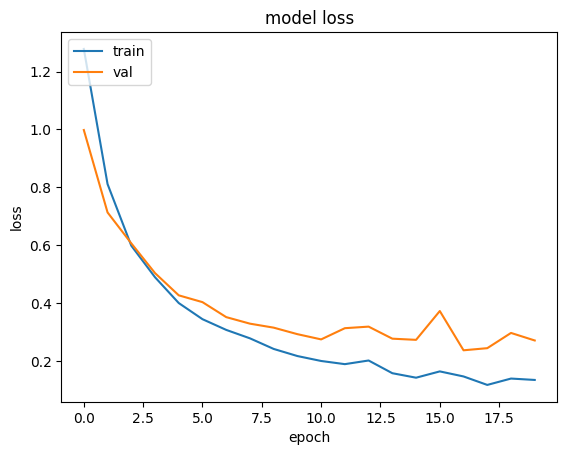

441/441 - 1s - 2ms/step - accuracy: 0.9262 - loss: 0.2528


In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
loss, acc = model.evaluate(x_test, y_test, verbose=2)

In [20]:
model.save('skin_disease_model.h5')